## 4.2 卷积神经⽹络的Filters(卷积核/过滤器)

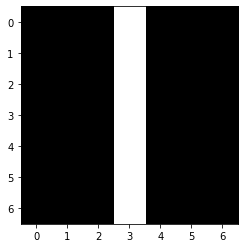

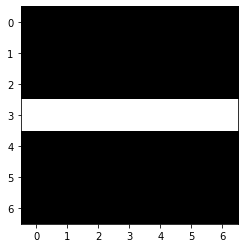

In [6]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")           

china = load_sample_image("china.jpg")        #加载图像
image = china[150:220, 130:250]
height, width, channels = image.shape

image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)   #0为纯黑，1为纯白
fmap[:, 3, 0, 0] = 1           #垂直过滤器
fmap[3, :, 0, 1] = 1          #水平过滤器

plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(images, feature_maps, strides=[1,1,1,1], padding="SAME")     #对图像进行卷积

## 4.3. 卷积神经⽹络池化层

In [3]:
import numpy  as np
def plot_color_image(image):
    plt.imshow(image,interpolation="nearest")
    plt.axis("off")
np.shape(dataset)

NameError: name 'dataset' is not defined

In [7]:
from tensorflow.keras.datasets import  mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images1,test_images1=train_images/255.0,test_images/255.0

#dataset=tf.expand_dims(train_images,0)
dataset=train_images

max_pool = tf.nn.max_pool(
                                                    dataset,
                                                    ksize=[2,2,1], 
                                                    strides=[2,2,1],
                                                    padding="VALID"
                                                )
plt.figure(figsize=(16, 12))
plt.subplot(121)
plot_color_image(dataset[0])
plt.subplot(122)
plot_color_image(max_pool[0])
plt.show()


InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 0 [Op:Squeeze]

## 4.5  MNIST CNN实现
分析并运⾏下列代码，完成如下任务：
1. 阅读代码，分析CNN和全链接⽹络的相同点和不同点；
2. 运⾏代码，从运⾏时间、准确性等⽅⾯与全连接⽹络进⾏⽐较；
3. 尝试提出改进⽅案，提⾼模型的准确率。

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np

(X_tarin, y_train), (X_test, y_test) = mnist.load_data()

X_train4D = X_tarin.reshape(X_tarin.shape[0], 28, 28, 1).astype('float32')
X_test4D = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train4D_Normalize = X_train4D / 255 # 归⼀化
X_test4D_Normalize = X_test4D / 255

y_trainOnehot = to_categorical(y_train)
y_testOnehot = to_categorical(y_test)

In [3]:
 #建⽴模型
model = Sequential()
# ⼀层卷积
model.add(Conv2D( 
                                      filters=16,
                                      kernel_size=(5, 5),
                                      padding='same', 
                                      input_shape=(28, 28, 1),
                                      activation='relu'
                               )
                     )
# 池化层1
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# ⼆层卷积
model.add(Conv2D(
                                      filters=32, 
                                      kernel_size=(5, 5), 
                                      padding='same', 
                                      activation='relu'
                                    )
                     )

In [4]:
 #池化层2
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#三层卷积
model.add(Conv2D
                                     (
                                        filters=64, 
                                        kernel_size=(5, 5), 
                                         padding='same', 
                                         activation='relu'
                                     )
                    )

#四层卷积
model.add(Conv2D
                                     (
                                        filters=128, 
                                        kernel_size=(5, 5), 
                                        padding='same', 
                                       activation='relu'
                                     )
                     )
#池化层3
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

#Dense层1
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.25))

#Dense层2
model.add(Dense(10, activation='softmax')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)         

In [7]:
# 编译模型
model.compile(
                              loss='categorical_crossentropy',
                              optimizer='adam',
                              metrics=['accuracy']
                            )

In [8]:
#训练模型
train_history = model.fit( 
                                                 x=X_train4D_Normalize,
                                                 y=y_trainOnehot,
                                                 validation_split=0.2,
                                                 batch_size=300,
                                                 epochs=10,
                                                verbose=2
                                              )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 47s - loss: 0.5017 - accuracy: 0.8325 - val_loss: 0.0846 - val_accuracy: 0.9746
Epoch 2/10
48000/48000 - 47s - loss: 0.1179 - accuracy: 0.9641 - val_loss: 0.0624 - val_accuracy: 0.9812
Epoch 3/10
48000/48000 - 47s - loss: 0.0815 - accuracy: 0.9742 - val_loss: 0.0476 - val_accuracy: 0.9853
Epoch 4/10
48000/48000 - 48s - loss: 0.0639 - accuracy: 0.9801 - val_loss: 0.0397 - val_accuracy: 0.9886
Epoch 5/10
48000/48000 - 47s - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0380 - val_accuracy: 0.9893
Epoch 6/10
48000/48000 - 47s - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0361 - val_accuracy: 0.9895
Epoch 7/10
48000/48000 - 47s - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch 8/10
48000/48000 - 47s - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 9/10
48000/48000 - 50s - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0323 - val_accuracy: 0.9899
Epoch

In [12]:
#评估模型
model.evaluate(X_test4D_Normalize, y_testOnehot,verbose=2)[1]


10000/1 - 3s - loss: 0.0119 - accuracy: 0.9920


0.992

In [13]:
#预测
prediction = model.predict_classes(X_test4D_Normalize)